In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
feature_path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/bank_campaign_marketing_decision_tree.csv'
label_path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/bank_campaign_label_decision_tree.csv'

In [3]:
bank_full = pd.read_csv(feature_path)

bank_full_labels = pd.read_csv(label_path)

bank_full.head()

bank_full_labels.head()

,deposit_cat
0,1
1,1
2,1
3,1
4,1


In [4]:
data_train, data_test, label_train, label_test = train_test_split(bank_full, bank_full_labels, 
                                                                  test_size=0.2, random_state=6)

dt2 = DecisionTreeClassifier(max_depth=2)

dt2.fit(data_train, label_train)

dot_data = export_graphviz(decision_tree=dt2, feature_names=bank_full.columns, filled=True, 
                class_names=['term_deposit_yes','term_deposit_no'])

graph_big = pydotplus.graph_from_dot_data(dot_data)

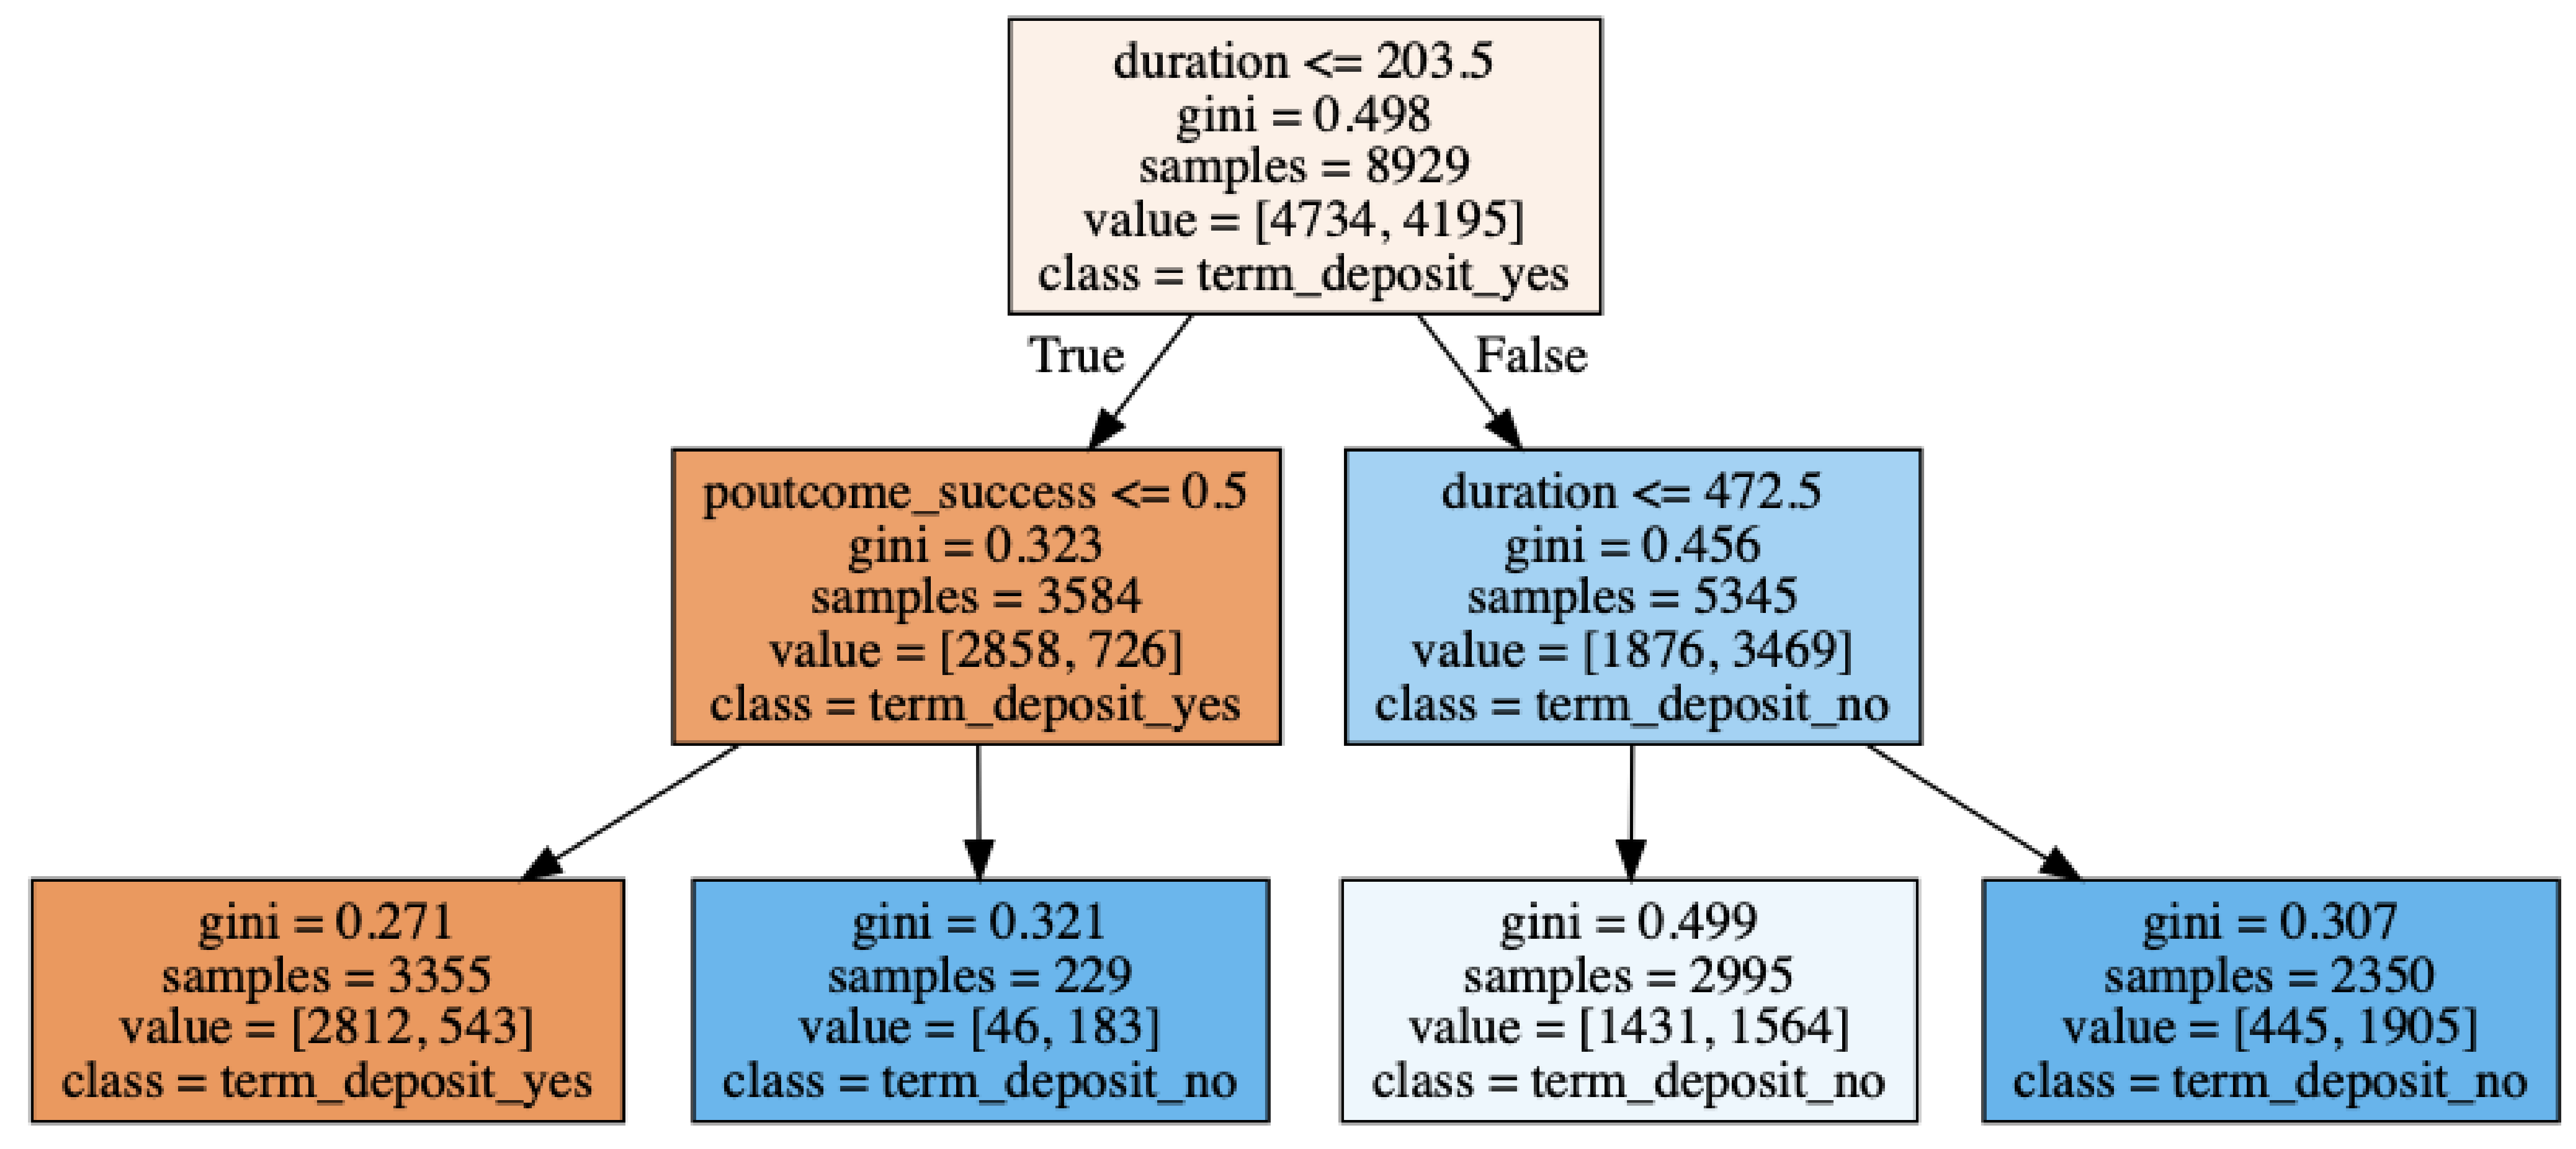

In [5]:
img_path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/file.png'
graph_big.write_png(img_path)

plt.figure(figsize=(90,90))
plt.imshow(plt.imread(img_path))
plt.axis('off')
plt.show()

In [6]:
dt2 = DecisionTreeClassifier(max_depth=3)

dt2.fit(data_train, label_train)

dt2_score_train = dt2.score(data_train, label_train)

dt2_score_test = dt2.score(data_test, label_test)

print(dt2_score_train, dt2_score_test)

0.7550677567476761 0.7586206896551724


In [7]:
dt4 = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=6)

dt4.fit(data_train, label_train)

dt4_score_train = dt4.score(data_train, label_train)

dt4_score_test = dt4.score(data_test, label_test)

dt_full = DecisionTreeClassifier(criterion='entropy', random_state=6)

dt_full.fit(data_train, label_train)

dt_full_score_train = dt_full.score(data_train, label_train)

dt_full_score_test = dt_full.score(data_test, label_test)

In [8]:
print(dt_full_score_train, dt_full_score_test)

1.0 0.7344379758172862



# Decision Tree Assessment


In [9]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/cleaned_loan_data_dt_assesment.csv'

In [10]:
data = pd.read_csv(path)

data.head()

X = data.iloc[ : , 1 : -1]

X.head()

y = data.iloc[ : , -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

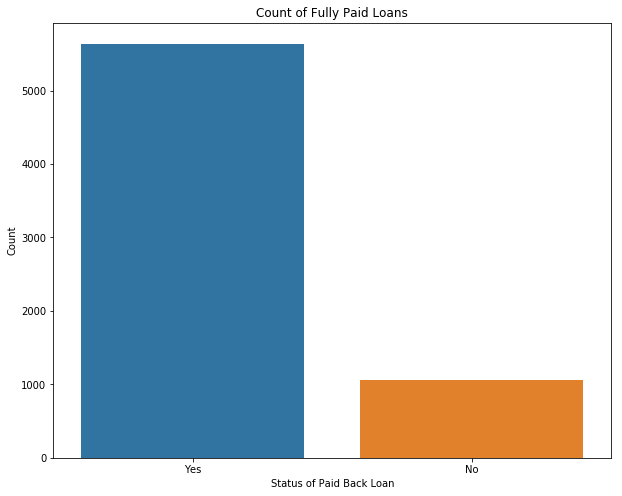

In [11]:
fully_paid = y_train.value_counts()

#fully_paid.index.tolist()

plt.figure(figsize=(10, 8))
sns.barplot(x=fully_paid.index, y=fully_paid.values)
plt.title('Count of Fully Paid Loans')
plt.ylabel('Count')
plt.xlabel('Status of Paid Back Loan')
plt.show()

In [12]:
def clean_int_rate(dataframe) :
    dataframe['int.rate'] = list(map(lambda x : str(x)[ : -1], dataframe['int.rate'].tolist()))

    dataframe['int.rate'] = dataframe['int.rate'].astype('float64')

    dataframe['int.rate'] = dataframe['int.rate']/100

clean_int_rate(X_train)

clean_int_rate(X_test)

num_df = X_train.select_dtypes(exclude='object').copy()

cat_df = X_train.select_dtypes(include='object').copy()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

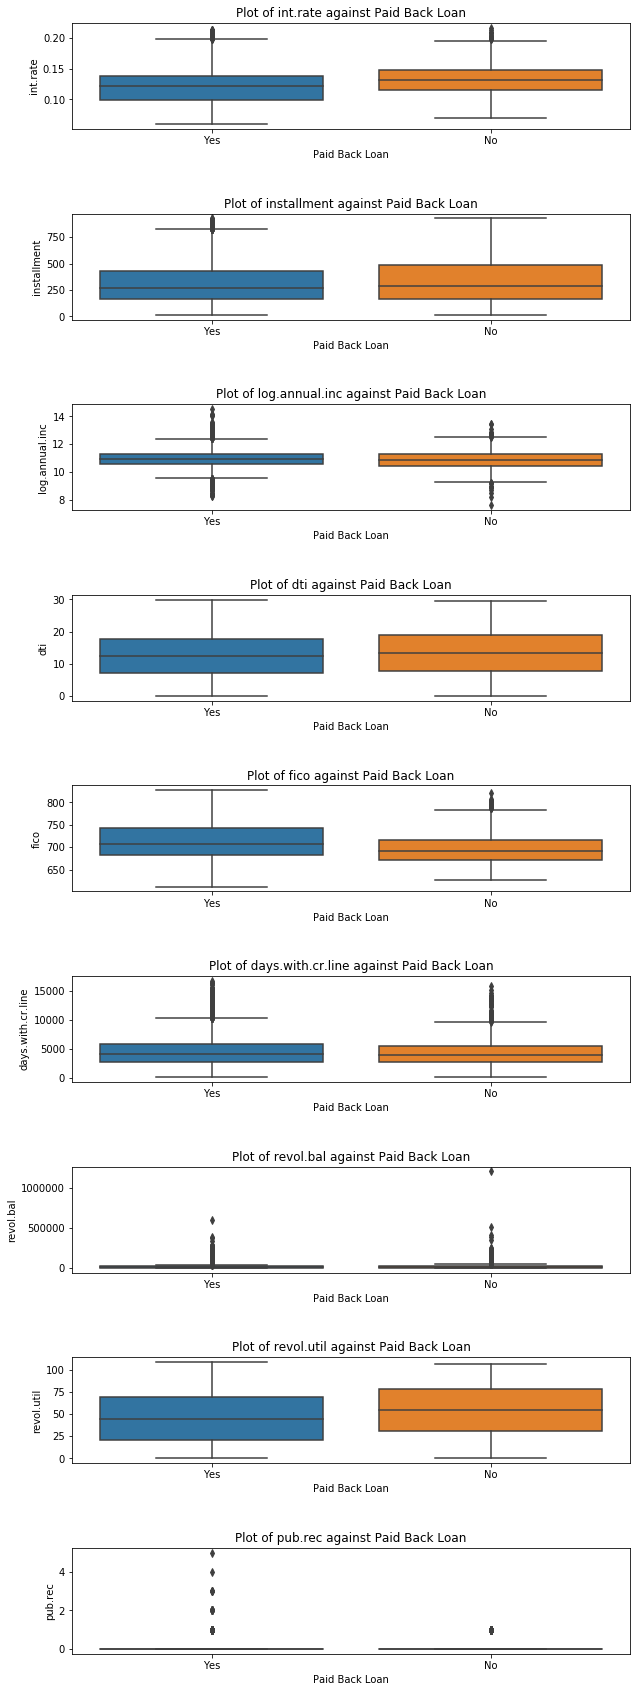

In [13]:
cols = num_df.columns.tolist()

fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(10, 30))
plt.subplots_adjust(hspace=0.8)
for i, ax in enumerate(axes) :
    sns.boxplot(x=y_train, y=X_train[cols[i]], ax = ax)
    ax.set(title='Plot of {} against Paid Back Loan'.format(cols[i]), xlabel='Paid Back Loan')

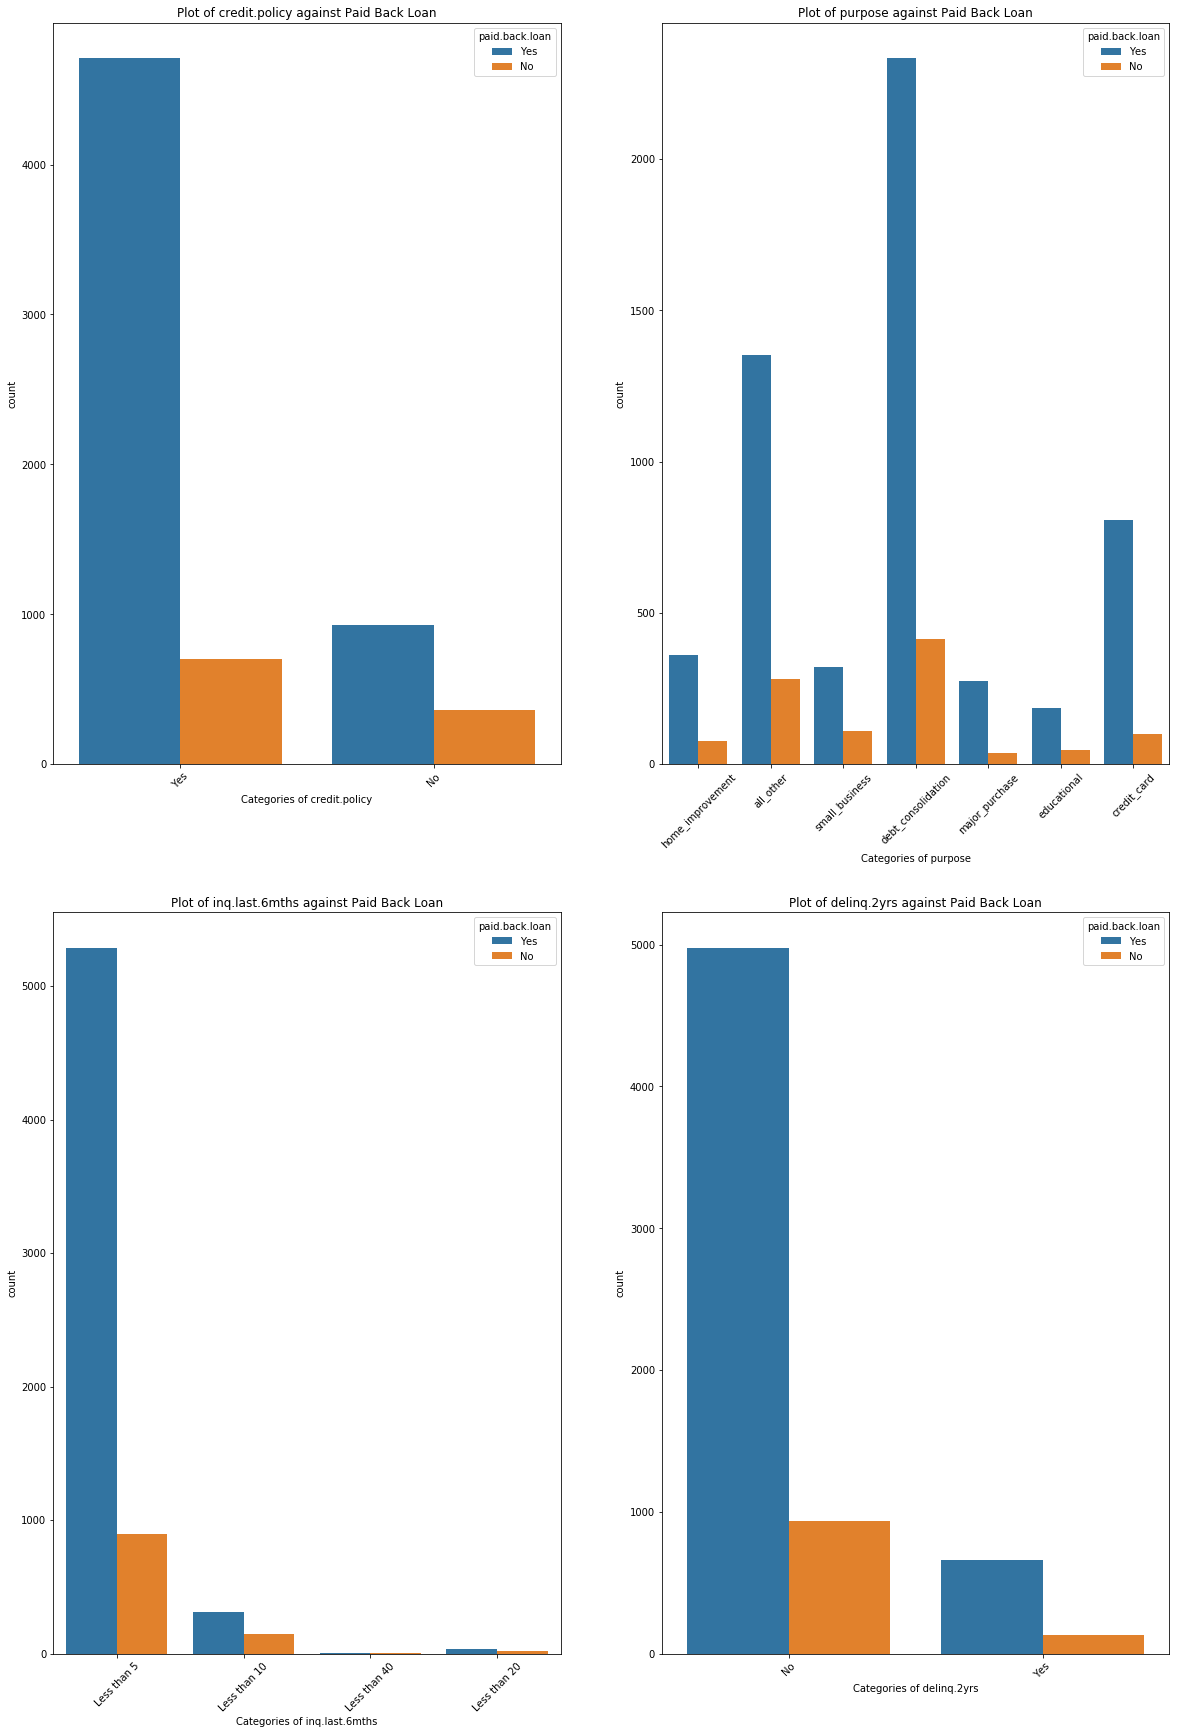

In [14]:
cols = cat_df.columns.tolist()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 30))
for i, j in np.ndindex(axes.shape):
    plot = sns.countplot(x = X_train[cols[2*i + j]], hue=y_train, ax = axes[i, j])
    axes[i, j].set(title='Plot of {} against Paid Back Loan'.format(cols[2*i + j]), 
                   xlabel='Categories of {}'.format(cols[2*i + j]))
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

In [15]:
X_train.isna().any()

X_train.fillna('NA', axis = 1, inplace=True)
X_test.fillna('NA', axis = 1, inplace=True)

le = LabelEncoder()

for cols in cat_df:
    X_train[cols]=le.fit_transform(X_train[[cols]])
    X_test[cols]=le.fit_transform(X_test[[cols]])

y_train = y_train.map(lambda x : 1 if x == 'Yes' else 0)
y_test = y_test.map(lambda x : 1 if x == 'Yes' else 0)

y_train.head()

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train)

acc = model.score(X_test, y_test)

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
pub.rec              False
inq.last.6mths       False
delinq.2yrs          False
dtype: bool

In [36]:
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

model_2 = DecisionTreeClassifier(random_state=0)

p_tree = GridSearchCV(estimator=model_2, param_grid=parameter_grid, cv=5)

p_tree.fit(X_train, y_train)

acc_2 = p_tree.score(X_test, y_test)

In [43]:
acc_2

0.837160751565762

In [45]:
dot_data = export_graphviz(decision_tree=p_tree.best_estimator_, out_file=None, feature_names=X.columns, 
                filled = True, class_names=['loan_paid_back_yes','loan_paid_back_no'])

graph_big = pydotplus.graph_from_dot_data(dot_data)

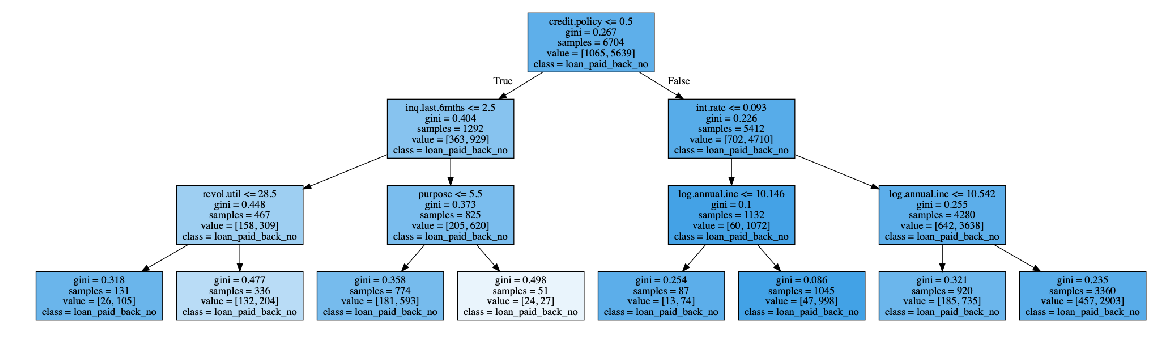

In [47]:
img_path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/file.png'
graph_big.write_png(img_path)

plt.figure(figsize=(20,15))
plt.imshow(plt.imread(img_path))
plt.axis('off')
plt.show()